In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import nltk
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import codecs
from tqdm import tqdm
import tensorflow as tf
import shutil


from keras.models import Sequential
from keras.layers import LSTM, GRU,SimpleRNN
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer

import re
from tensorflow.keras.preprocessing.text import one_hot
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_cleaned_data = pd.read_csv("drive/MyDrive/Colab Notebooks/data/train_cleaned_rnn.csv")
test_cleaned_data = pd.read_csv("drive/MyDrive/Colab Notebooks/data/train_cleaned_rnn.csv")

X_train_data = train_cleaned_data['tweet_cleaned']
y_train_data = train_cleaned_data['label']

X_test_data = test_cleaned_data['tweet_cleaned']
y_test_data = test_cleaned_data['label']


In [5]:
def one_hot_enc(X_data, y_data):
  corpus=[]
  for i in range(len(X_data)):
      #replacing everything other than alphabets with a space
      review=re.sub("[^a-zA-Z]"," ",str(X_data[i]))
      #Lowering the tweets
      review=review.lower()
      #Converting in a list
      review=review.split()
      #Joining after removal of stopwords
      review=" ".join(review)
      corpus.append(review)

  vocab_size = 5000

  #one hot encoding
  one_hot_dir = [one_hot(words,vocab_size) for words in corpus]

  #length of all rows should be equal therefore applying padding
  #this will adjust size by adding 0 at staring of the shorter rows
  embedded_layer = pad_sequences(one_hot_dir,padding = 'pre')
  #converting into numpy arrays.
  return np.array(embedded_layer), np.array(y_data)






In [6]:
X_gru, y_gru = one_hot_enc(X_train_data, y_train_data)
X_train_gru,X_val_gru,y_train_gru,y_val_gru=train_test_split(X_gru,y_gru,test_size=0.2,random_state=0)
X_test_gru, y_test_gru = one_hot_enc(X_test_data, y_test_data)


In [ ]:
# model = Sequential()
# model.add(Embedding(vocab_size,64,input_length = len(X_lstm[0])))
# model.add(Dropout(0.3))
# model.add(LSTM(128))
# model.add(Dropout(0.3))
# model.add(Dense(1,activation="sigmoid"))
# model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
# model.summary()
# model = Sequential()
# model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=len(X_lstm[0]), trainable=False))
# model.add(SpatialDropout1D(0.3))
# model.add(GRU(128))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model, history = train_gru(x_train_gru, y_train_gru, x_val_gru, y_val_gru, vocab_size, len(X_lstm[0]), embedding_matrix=None, embedding_dim=300, epochs=5, batch_size=64):
history = model.fit(X_train_lstm, y_train_lstm, validation_data = (X_val_lstm,y_val_lstm), epochs = 15, batch_size = 32)

Epoch 1/15
508/508 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9209 - loss: 0.2784 - val_accuracy: 0.9401 - val_loss: 0.1709
Epoch 2/15
508/508 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9562 - loss: 0.1200 - val_accuracy: 0.9480 - val_loss: 0.1564
Epoch 3/15
508/508 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9716 - loss: 0.0780 - val_accuracy: 0.9465 - val_loss: 0.1862
Epoch 4/15
508/508 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9813 - loss: 0.0534 - val_accuracy: 0.9443 - val_loss: 0.2103
Epoch 5/15
508/508 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9883 - loss: 0.0345 - val_accuracy: 0.9327 - val_loss: 0.2428
Epoch 6/15
508/508 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9934 - loss: 0.0212 - val_accuracy: 0.9377 - val_loss: 0.2798
Epoch 7/15
508/508 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9952 - loss: 0.0170 - val_accuracy: 0.9379 - val_loss: 0.3509
Epoch 8/15
508/508 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9965 - loss: 0.0106 - val

In [ ]:
y_pred_lstm = model.predict(X_val_lstm)
y_pred_lstm = (y_pred_lstm > 0.5)
print(confusion_matrix(y_val_lstm,y_pred_lstm))
print(accuracy_score(y_val_lstm,y_pred_lstm))

127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
[[3698   97]
 [ 161  102]]
0.9364218827008378


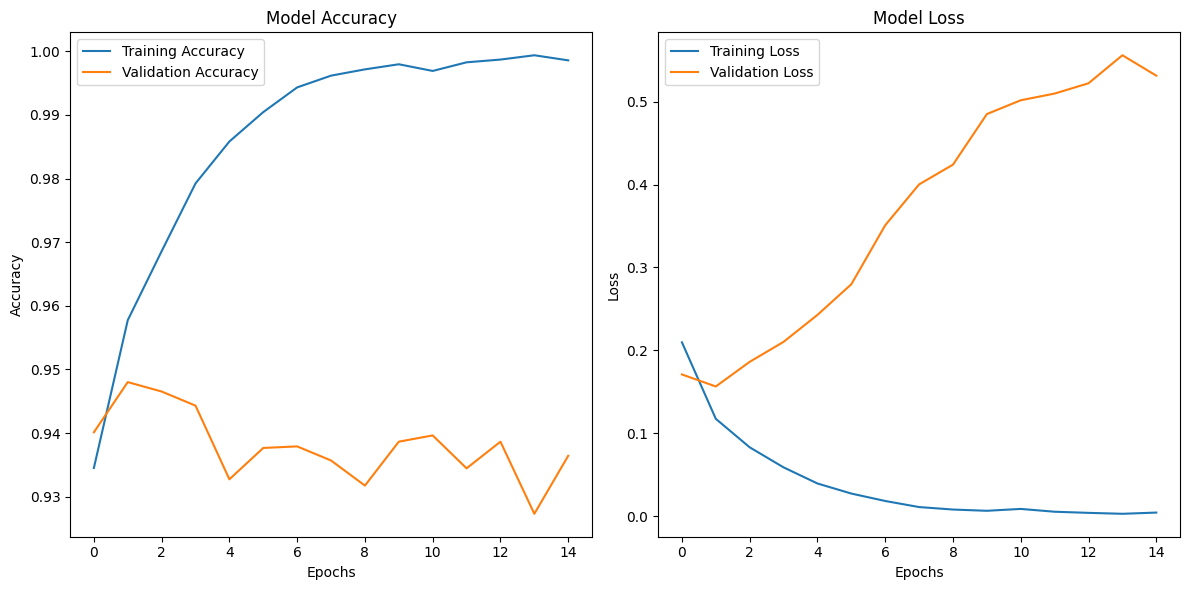


Validation Performance:
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


NameError: name 'roc_auc_score' is not defined


Test Performance:
635/635 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Accuracy: 0.9872
Precision: 0.9238
Recall: 0.8783
F1 Score: 0.9005

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18950
           1       0.92      0.88      0.90      1339

    accuracy                           0.99     20289
   macro avg       0.96      0.94      0.95     20289
weighted avg       0.99      0.99      0.99     20289



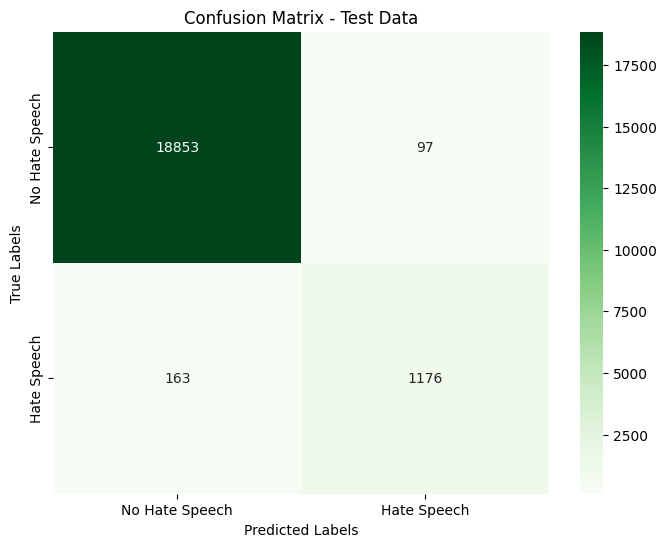

In [ ]:
evaluate_on_test(
    model, X_test_lstm, y_test_lstm
)

#### -----------------------------------------------------------------------


In [ ]:
# Konvertiere alle Werte in Strings
X_train_data = [str(x) if not isinstance(x, str) else x for x in X_train_data]
X_test_data = [str(x) if not isinstance(x, str) else x for x in X_test_data]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_data)
word_index = tokenizer.word_index

xtrain_seq = tokenizer.texts_to_sequences(X_train_data)
xtest_seq = tokenizer.texts_to_sequences(X_test_data)

max_len = max(len(seq) for seq in xtrain_seq)
xtrain_pad = pad_sequences(xtrain_seq, padding='post', maxlen=max_len)
xtest_pad = pad_sequences(xtest_seq, padding='post', maxlen=max_len)


In [ ]:
print('Preprocessed text', X_train_data[1])
print('\nTokenized text', xtrain_seq[1])
print('\nPadded text', xtrain_pad[1])
print('\nPadded text Length: ', len(xtrain_pad[1]))

Preprocessed text @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked

Tokenized text [1, 1, 165, 9, 5485, 2484, 5, 64, 490, 638, 65, 70, 1485, 7896, 10268, 8, 7897, 16187, 10269]

Padded text [    1     1   165     9  5485  2484     5    64   490   638    65    70
  1485  7896 10268     8  7897 16187 10269     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]

Padded text Length:  42


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(xtrain_pad, y_train_data, test_size=0.2, random_state=42)

### Embeddings

In [ ]:
def load_embeddings(file_path, embedding_dim, word_index):
    embedding_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.rstrip().split(' ')
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_index, embedding_matrix


In [ ]:
import requests, zipfile, io
zip_file_url = "http://nlp.stanford.edu/data/glove.6B.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
import requests, zipfile, io
zip_file_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

### Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

def train_rnn(x_train, y_train, x_val, y_val, word_index, max_len, embedding_matrix=None, embedding_dim=300, epochs=5, batch_size=64):
    model = Sequential()
    if embedding_matrix is not None:
        model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
    else:
        model.add(Embedding(len(word_index) + 1, embedding_dim, input_length=max_len))
    model.add(SimpleRNN(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
    return model, history

def train_lstm(x_train, y_train, x_val, y_val, word_index, max_len, embedding_matrix=None, embedding_dim=300, epochs=5, batch_size=64):
    model = Sequential()
    if embedding_matrix is not None:
        model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
    else:
        model.add(Embedding(len(word_index) + 1, embedding_dim, input_length=max_len))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
    return model, history

def train_gru(x_train, y_train, x_val, y_val, word_index, max_len, embedding_matrix=None, embedding_dim=300, epochs=5, batch_size=64):
    model = Sequential()
    if embedding_matrix is not None:
        model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
    else:
        model.add(Embedding(len(word_index) + 1, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(0.3))
    model.add(GRU(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
    return model, history


### Training

In [ ]:
glove_file_path = 'drive/MyDrive/Colab Notebooks/data/embeddings/glove.twitter.27B.200d.txt'
fasttext_file_path = 'wiki-news-300d-1M.vec'
embedding_dim = 200
glove_embedding_index, glove_embedding_matrix = load_embeddings(glove_file_path, embedding_dim, word_index)
# fasttext_embedding_index, fasttext_embedding_matrix = load_embeddings(fasttext_file_path, embedding_dim, word_index)

TypeError: object of type 'int' has no len()

##### GRU

In [ ]:
print("Training GRU with GloVe Embeddings")
gru_glove, gru_glove_history = train_gru(
    X_train, y_train, X_val, y_val,
    word_index, max_len)

# print("Training GRU with FastText Embeddings")
# gru_fasttext, gru_fasttext_history = train_gru(
#     X_train_resampled, y_train_resampled, X_val, y_val,
#     word_index, max_len, embedding_matrix=fasttext_embedding_matrix)

# print("Training GRU with Word2Vec Embeddings")
# gru_word2vec, gru_word2vec_history = train_gru(
#     X_train_resampled, y_train_resampled, X_val, y_val,
#     word_index, max_len)


Training GRU with GloVe Embeddings
Epoch 1/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9349 - loss: 0.2703 - val_accuracy: 0.9325 - val_loss: 0.2484
Epoch 2/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9384 - loss: 0.2327 - val_accuracy: 0.9325 - val_loss: 0.2477
Epoch 3/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9327 - loss: 0.2475 - val_accuracy: 0.9325 - val_loss: 0.2492
Epoch 4/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9337 - loss: 0.2465 - val_accuracy: 0.9325 - val_loss: 0.2473
Epoch 5/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9327 - loss: 0.2490 - val_accuracy: 0.9325 - val_loss: 0.2474


### Evaluation

In [ ]:
def evaluate_on_validation(model, history, X_val, y_val):
    """
    Evaluates the model on validation data with detailed metrics and visualizes training performance.

    Parameters:
    - model: Trained model to evaluate.
    - history: Training history object.
    - X_val: Validation data (features).
    - y_val: Validation data (labels).

    Returns:
    None
    """
    # Plot Training and Validation Metrics
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluate Validation Data
    print("\nValidation Performance:")
    y_val_pred = (model.predict(X_val) > 0.5).astype(int)

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    # roc_auc = roc_auc_score(y_val, model.predict(X_val))

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    # print(f"ROC AUC: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hate Speech', 'Hate Speech'], yticklabels=['No Hate Speech', 'Hate Speech'])
    plt.title('Confusion Matrix - Validation Data')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [ ]:
def evaluate_on_test(model, X_test, y_test):
    """
    Evaluates the model on an independent test dataset with detailed metrics.

    Parameters:
    - model: Trained model to evaluate.
    - X_test: Test data (features).
    - y_test: Test data (labels).

    Returns:
    None
    """
    print("\nTest Performance:")
    y_test_pred = (model.predict(X_test) > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    # roc_auc = roc_auc_score(y_test, model.predict(X_test))

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    # print(f"ROC AUC: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No Hate Speech', 'Hate Speech'], yticklabels=['No Hate Speech', 'Hate Speech'])
    plt.title('Confusion Matrix - Test Data')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


#### GRU

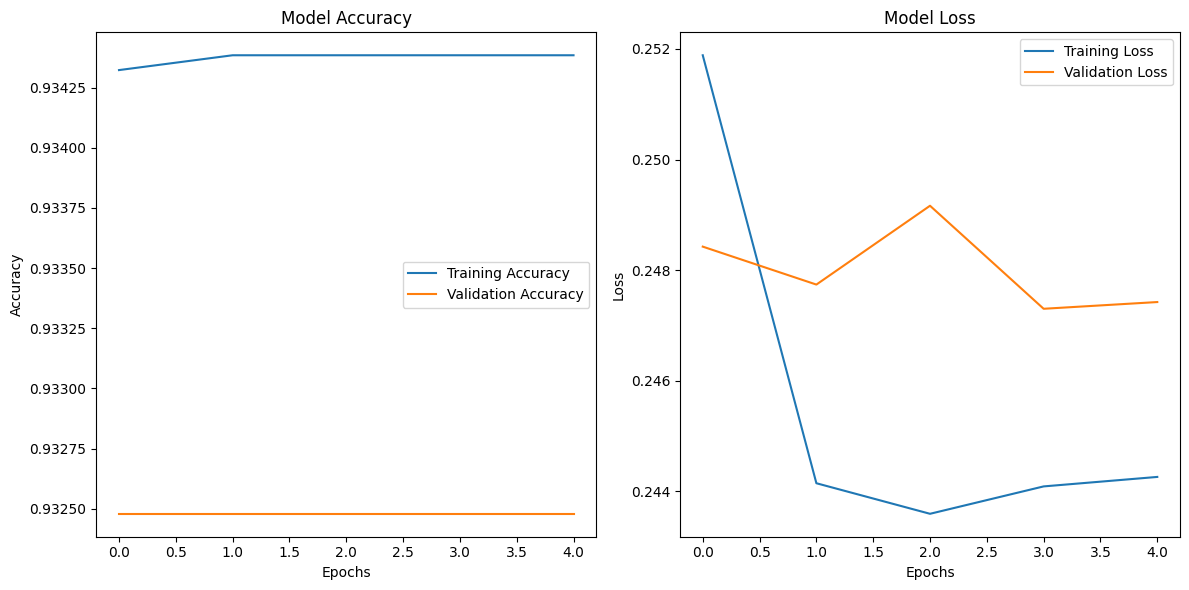


Validation Performance:
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy: 0.9325
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.4999

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      3784
           1       0.00      0.00      0.00       274

    accuracy                           0.93      4058
   macro avg       0.47      0.50      0.48      4058
weighted avg       0.87      0.93      0.90      4058



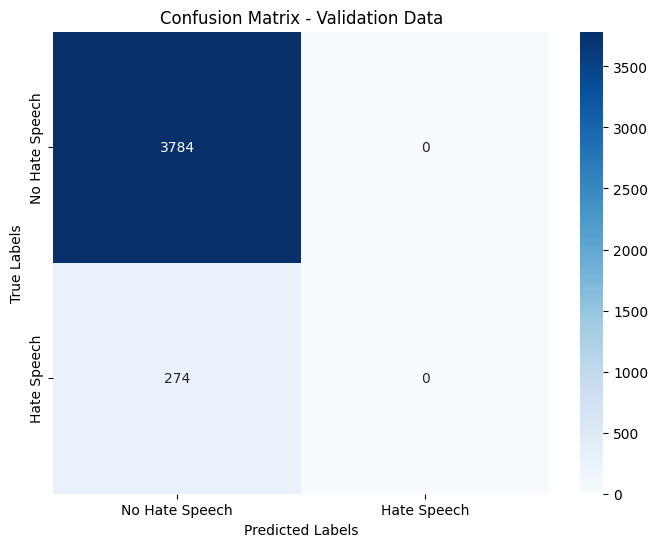

In [ ]:

evaluate_on_validation(
    gru_glove, gru_glove_history, X_val, y_val
)


Test Performance:
635/635 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
635/635 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Accuracy: 0.9340
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     18950
           1       0.00      0.00      0.00      1339

    accuracy                           0.93     20289
   macro avg       0.47      0.50      0.48     20289
weighted avg       0.87      0.93      0.90     20289



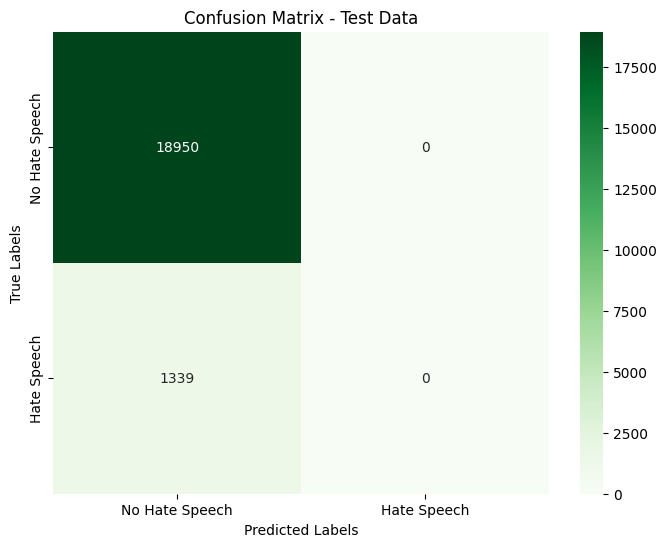

In [ ]:
evaluate_on_test(
    gru_glove, xtest_pad, y_test_data
)